# Amazon Movie Viewtime Prediction


## 1. Background Description

With the unexpected Coronavirus pandemic spreads around the globe, social daily life has been severely affected. More and more people have been restricted to stay at home. In China, a province have been locked down and in Italy even the whole nation has been locked down to slow the spread of the coronavirus. People in San Francisco has been asked to shelter in place. Cinemas, stadiums, restaurants and many other local stores may not be available until the outbreak showing signs of improvement. 

<img src="files/Picture1.png" width="720" />

As a result, during the outbreak, people's entertainment will shift more from offline to online. Recall the outbreak of SARS in 2003, "Although it sickened thousands and killed almost eight hundred people, the outbreak had a curiously beneficial impact on the Chinese Internet sector, including Alibaba", as written by Duncan Clark, an American entrepreneur and investor. Now Alibaba is worthing more than 500 billion dollars, thus, we can believe after the outbreak of coronavirus, online movies will play a more and more important role, and companies who can seize this opportunity may become the next "Alibaba". Imagine if you were the CEO of a company, which movies you want to import to your online platform for your members? How to make the best choice among tons of movie resources with limited budget? How to select movies to attract more members? 

<img src="files/Picture2.png" width="600" />

## 2. Project Introduction

Here, this project can provide some enlightenment to solve the problem. For this project, we will scrape information of Amazon Prime Videos as our data source, which including the ID, movie genres, release year, budget, boxoffice, content partners, cumulated viewtimes and etc. We will use a supervise learning algorithm to build a prediction model which can predict the viewtimes of a movie based on the movie information. We used Python Requests to download the HTML pages, and BeautifulSoup to process the HTML to acquire all the 16 features for more than 4000 movies and export all the data into the text file "Amazon Prime Video data" for the next step analysis. We will use viewtimes as the "Y" value for each movie and the rest 15 features as "X" values. 

<img src="files/picture3.png" width="900" />

## 3. Data Exploration

In [2]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)

First, let's take a look at our dataset and do some basic data exploration:

In [3]:
tv_df = pd.read_csv('Amazon Prime Video data.txt') 

In [9]:
tv_df.head()

,video_id,viewtimes_day,vertical_position,horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_score
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


In [10]:
print(tv_df.shape[0],tv_df.shape[1])

4226 16


In [11]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id              4226 non-null int64
viewtimes_day         4226 non-null float64
vertical_position     4226 non-null int64
horizontal_poition    4226 non-null int64
import_id             4226 non-null object
release_year          4226 non-null int64
genres                4226 non-null object
imdb_votes            4226 non-null int64
budget                4226 non-null int64
boxoffice             4226 non-null int64
imdb_rating           4226 non-null float64
duration_in_mins      4226 non-null float64
metacritic_score      4226 non-null int64
awards                4226 non-null object
mpaa                  4226 non-null object
star_score            4226 non-null float64
dtypes: float64(4), int64(8), object(4)
memory usage: 528.4+ KB


In [12]:
tv_df.nunique()

video_id              4226
viewtimes_day         4226
vertical_position       37
horizontal_poition      68
import_id                4
release_year            97
genres                1165
imdb_votes            2282
budget                 253
boxoffice              410
imdb_rating             85
duration_in_mins      4097
metacritic_score        90
awards                   5
mpaa                     6
star_score             630
dtype: int64

### 3.1 Understand Numerical Features

Let's look at the target varaible:

In [14]:
y = tv_df['viewtimes_day'] # load target variable

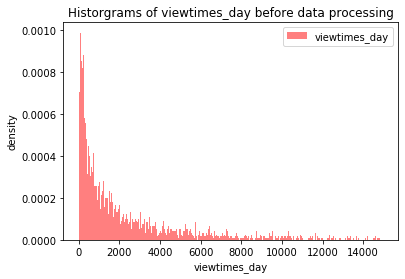

In [15]:
plt.hist(tv_df['viewtimes_day'],bins=range(0,15000,30),color='r',label='viewtimes_day',density=True,alpha=0.5)
plt.title('Historgrams of viewtimes_day before data processing')
plt.legend(loc='upper right')
plt.xlabel('viewtimes_day')
plt.ylabel('density')
plt.show()

Then, let's check the correlation among numerical features:

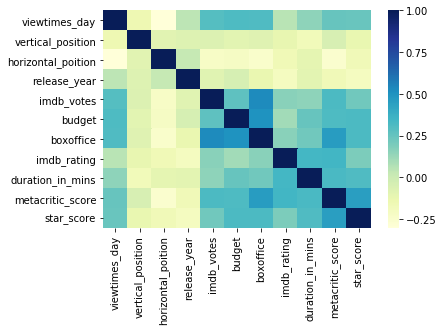

In [17]:
corr = tv_df[['viewtimes_day','vertical_position','horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
               'duration_in_mins', 'metacritic_score', 'star_score']].corr()

sns.heatmap(corr, cmap="YlGnBu")

In [18]:
corr

,viewtimes_day,vertical_position,horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_score
viewtimes_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
vertical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


### 3.2 Understand Categorical Features 

Distribution of standard categorical features

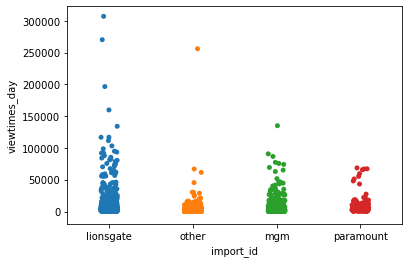

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


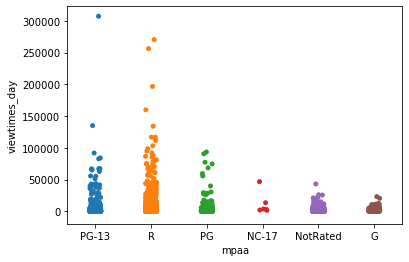

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


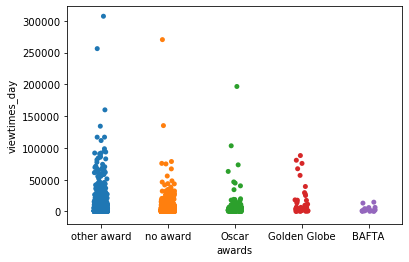

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [21]:
sns.stripplot(x='import_id', y='viewtimes_day', data=tv_df,jitter=True)
plt.show()
print(tv_df['import_id'].value_counts())

sns.stripplot(x='mpaa', y='viewtimes_day', data=tv_df,jitter=True)
plt.show()
print(tv_df['mpaa'].value_counts())

sns.stripplot(x='awards', y='viewtimes_day', data=tv_df, jitter=True)
plt.show()
print(tv_df['awards'].value_counts())

After very basic Exploratory Data Analysis, we have to do some data cleaning and data preprocessing. We need three steps to finish this: 

1. Encoding the categorical feature. 
2. Imputing the missing value for both numeric and categorical feature.
3. Scaling out features which can be better for our models' performance.

Some videos belongs to more than one genre, distribution of splited genres would help us to emphasize the effect of each individual genre.

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


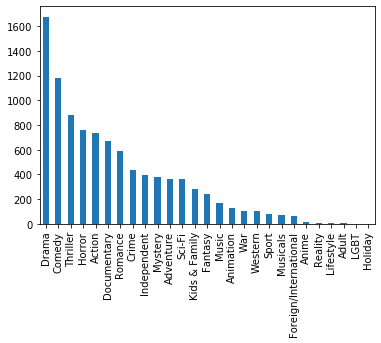

In [22]:
# generes explore, split the genre of each video
gen_split = tv_df['genres'].str.get_dummies(sep=',').sum()
print(gen_split)

gen_split.sort_values(ascending=False).plot.bar()

The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range.

/opt/conda/envs/data3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


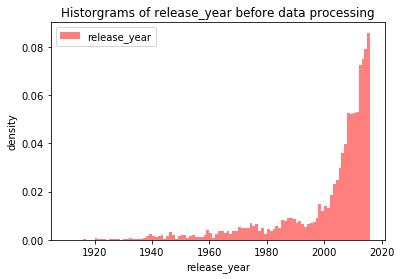

In [23]:
plt.hist(tv_df['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, color='r', label = 'release_year', normed = True)
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

## 4. Feature Preprocessing

### 4.1 Categorical Features 

There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.

The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [25]:
# Convert 3 Categorical variables into dummy variables
d_import_id = pd.get_dummies(tv_df['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(tv_df['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(tv_df['awards']).astype(np.int64)

In [27]:
# Convert 'genres' into dummy variables
d_genres=tv_df['genres'].str.get_dummies(sep=',').astype(np.int64)
d_genres['Misc_genres']=d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [30]:
# bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(tv_df['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)

In [31]:
# new dataframe, drop the previous categorical features, add new dummy variables, check for null

temp_tv=tv_df.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)

newTV = pd.concat([temp_tv, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
print(newTV.head())

   video_id  viewtimes_day  vertical_position  horizontal_poition  imdb_votes  \
0    385504     307127.606                  1                   3       69614   
1    300175     270338.426                  1                   3       46705   
2    361899     256165.867                  1                   3      197596   
3    308314     196622.721                  3                   4      356339   
4    307201     159841.652                  1                   3       46720   

     budget  boxoffice  imdb_rating  duration_in_mins  metacritic_score  \
0  15000000   42930462        6.500           112.301                51   
1  15000000    3301046        6.500            94.983                41   
2  26000000   37397291        7.300           115.764                58   
3  15000000   15700000        7.600           130.704                94   
4  27220000    8551228        6.400           105.546                37   

   star_score  lionsgate  mgm  other  paramount  G  NC-17  Not

### 4.2 Missing Data 

Among the 10 numerical features (not include video_id), 4 features have over 25% of missing values (shown as '0', which is not possible in reality): budget, boxoffice, metacritic_score, star_score. 2 features have less than 10% of missing data: imdb_votes, imdb_rating.

There are 3242 samples have at least one missing data.

Now we have to deal with the missing data. According to the data info, there is no Null value in our dataset, but we have to be catious, because zero value can be a very good candidate for missing data. So we have to check the ratio of zero value in our numerical features. 

In [34]:
newTV[['budget','boxoffice','metacritic_score', 'star_score','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_score','imdb_votes', 'imdb_rating']].replace(0, np.nan)
print(newTV.info())
print(newTV.isnull().sum()/newTV.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
video_id                 4226 non-null int64
viewtimes_day            4226 non-null float64
vertical_position        4226 non-null int64
horizontal_poition       4226 non-null int64
imdb_votes               3882 non-null float64
budget                   1772 non-null float64
boxoffice                1032 non-null float64
imdb_rating              3882 non-null float64
duration_in_mins         4226 non-null float64
metacritic_score         1214 non-null float64
star_score               2380 non-null float64
lionsgate                4226 non-null int64
mgm                      4226 non-null int64
other                    4226 non-null int64
paramount                4226 non-null int64
G                        4226 non-null int64
NC-17                    4226 non-null int64
NotRated                 4226 non-null int64
PG                       4226 non-null int64
PG-13                 

Filling missing data with mean value

In [35]:
newTV1=newTV.copy()
newTV1['boxoffice']=newTV1['boxoffice'].fillna(newTV1['boxoffice'].mean())
newTV1['metacritic_score']=newTV1['metacritic_score'].fillna(newTV1['metacritic_score'].mean())
newTV1['star_score']=newTV1['star_score'].fillna(newTV1['star_score'].mean())
newTV1['imdb_votes']=newTV1['imdb_votes'].fillna(newTV1['imdb_votes'].mean())
newTV1['imdb_rating']=newTV1['imdb_rating'].fillna(newTV1['imdb_rating'].mean())
newTV1['budget']=newTV1['budget'].fillna(newTV1['budget'].mean())
print(newTV1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
video_id                 4226 non-null int64
viewtimes_day            4226 non-null float64
vertical_position        4226 non-null int64
horizontal_poition       4226 non-null int64
imdb_votes               4226 non-null float64
budget                   4226 non-null float64
boxoffice                4226 non-null float64
imdb_rating              4226 non-null float64
duration_in_mins         4226 non-null float64
metacritic_score         4226 non-null float64
star_score               4226 non-null float64
lionsgate                4226 non-null int64
mgm                      4226 non-null int64
other                    4226 non-null int64
paramount                4226 non-null int64
G                        4226 non-null int64
NC-17                    4226 non-null int64
NotRated                 4226 non-null int64
PG                       4226 non-null int64
PG-13                 

### 4.3 Feature Scaling

Here we will use standardscaler to do the feature scaling

In [36]:
#Standard scaling
scale_lst = ['vertical_position', 'horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_score']
newTV_sc = newTV1.copy()

sc_scale = StandardScaler().fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])

newTV_sc.head()

,video_id,viewtimes_day,vertical_position,horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_score,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,0.033,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,3.434,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,2.102,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,-0.063,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,3.029,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## 5. Model Training 

Now, we come to the fun part: model training. Here we will apply Lasso, Ridge and Random Forest models to train our dataset. 

Before we start the training, we need to split the dataset to save some data for testing. 

In [38]:
model_train, model_test = train_test_split(newTV_sc, test_size=0.15, random_state = 3)
model_train_x = model_train.drop(['video_id', 'viewtimes_day'], axis = 1)
model_test_x = model_test.drop(['video_id', 'viewtimes_day'], axis = 1)
model_train_y = model_train['viewtimes_day']
model_test_y = model_test['viewtimes_day']

### 5.1 Lasso Linear Regression 

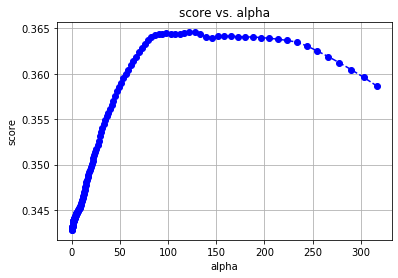

The optimaized alpha and score of Lasso linear is: 


(None, 122.06107238906554, 0.36457853302954246)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'viewtimes_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'viewtimes_day'], axis = 1)
lr_train_y = lr_train['viewtimes_day']
lr_validate_y = lr_validate['viewtimes_day']

alphas = np.logspace (-0.3, 2.5, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score

In [42]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

Lasso(alpha=122.06107238906554, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### 5.2 Lasso Linear Regression Polynomial-2 

/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32955562904.809772, tolerance: 48022560.44586841
  positive)
/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32961858347.037666, tolerance: 48022560.44586841
  positive)
/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32969156642.673843, tolerance: 48022560.44586841
  positive)
/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the numb

/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35769002499.51452, tolerance: 48022560.44586841
  positive)
/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36130305094.5606, tolerance: 48022560.44586841
  positive)
/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36535744243.55806, tolerance: 48022560.44586841
  positive)
/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number o

/opt/conda/envs/data3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203086025.11465454, tolerance: 48022560.44586841
  positive)


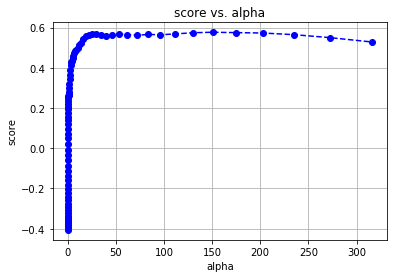

The optimaized alpha and score of Lasso polynomial is: 


(None, 150.38869469554086, 0.5764936326091716)

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'viewtimes_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'viewtimes_day'], axis = 1)

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)
lr_train_y = lr_train['viewtimes_day']
lr_validate_y = lr_validate['viewtimes_day']

# lr_train_xp = pd.DataFrame(data=lr_train_xp, index=data[:], columns=data[0,1:]) 

alphas = np.logspace (-2.6, 2.5, num=80)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_xp, lr_train_y)
    scores[i] = lasso.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso polynomial is: '), opt_a, max_score

In [45]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lr_train_xp1 = poly.fit_transform(model_train_x)

lasso_fp = Lasso()
lasso_fp.set_params(alpha = opt_a)
lasso_fp.fit(lr_train_xp1, model_train_y)

# lasso_fp is the Lasso model (polynomial feature), to be tested with test data.

Lasso(alpha=150.38869469554086, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### 5.3  Ridge Linear Regression 

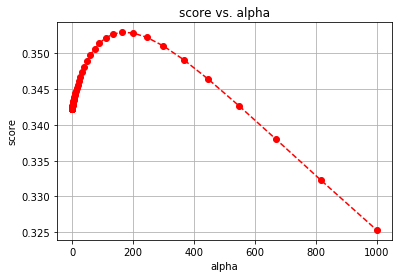

The optimaized alpha and score of Ridge linear is: 


(None, 163.97026580002054, 0.35296043098491625)

In [46]:
# Use the same training data set as Lasso (linear features)
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

alphas = np.logspace (-10, 3, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [47]:
# add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=163.97026580002054, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### 5.4 Ridge Linear Regression Polynomial-2 

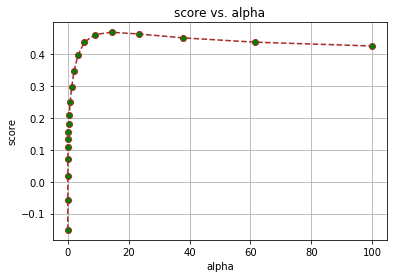

The optimaized alpha and score of Ridge linear is: 


(None, 14.38449888287663, 0.46816918700195065)

In [48]:
# Use the same training data set as Lasso (polynomial features)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'viewtimes_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'viewtimes_day'], axis = 1)
lr_train_y = lr_train['viewtimes_day']
lr_validate_y = lr_validate['viewtimes_day']

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)

alphas = np.logspace (-2, 2, num=20)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_xp, lr_train_y)
    scores[i] = ridge.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
        
plt.plot(alphas, scores, color='brown', linestyle='dashed', marker='o',markerfacecolor='g', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

### 5.5 Random Forest 

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=2,max_features='sqrt',n_jobs=-1)
param_grid={'n_estimators':[55,56,57,58,59,60,61,62,63,64,65],'max_depth':[15,16,17,18,19,20,21]}
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,refit=True,n_jobs=-1,pre_dispatch='2*n_jobs')
clf.fit(model_train_x,model_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 

{'mean_fit_time': array([0.46974435, 0.39390178, 0.49565592, 0.56176729, 0.72240462,
       0.8194551 , 0.5941905 , 0.55051737, 0.54554024, 0.51304646,
       0.52760301, 0.50896482, 0.5445291 , 0.65049253, 0.48410568,
       0.54225597, 0.46169991, 0.38232317, 0.48860936, 0.62593369,
       0.52723594, 0.52658997, 0.60561547, 0.46312571, 0.58200426,
       0.55403485, 0.5951993 , 0.53557229, 0.75834022, 0.54493685,
       0.65700111, 0.51536403, 0.6264555 , 0.57744884, 0.43960128,
       0.61608577, 0.68771262, 0.61445885, 0.54987488, 0.52004743,
       0.4800262 , 0.6896318 , 0.62615371, 0.51784067, 0.48199935,
       0.55017948, 0.50984416, 0.60404267, 0.5787539 , 0.65088453,
       0.52592959, 0.60876045, 0.52995872, 0.69120183, 0.68869195,
       0.55065293, 0.56913128, 0.61394391, 0.37516232, 0.54926348,
       0.63400135, 0.62816677, 0.60802183, 0.57524767, 0.58090611,
       0.70237513, 0.44933076, 0.55906987, 0.50157857, 0.5520699 ,
       0.55758023, 0.62422895, 0.70542259, 0

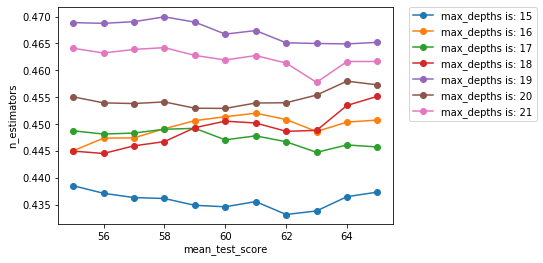

the best parameter for max_depth is: 19
the best parameter for n_estimators is: 58


In [51]:
result=clf.cv_results_
print(result)
max_depth=[15,16,17,18,19,20,21]
n_estimators=[55,56,57,58,59,60,61,62,63,64,65]
scores=clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))
plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
    plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('mean_test_score')
plt.ylabel('n_estimators')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))

## 6. Model Evaluation 

### 6.1 Evaluate All Models 

Now let's evaluate all models based on the results in Section 5. 

In [54]:
#For lasso, the optimal alpha is 122.06107238906554
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error
lasso=Lasso(alpha=122.06107238906554)
lasso.fit(model_train_x,model_train_y)
pred_y=lasso.predict(model_test_x)
lasso_score=lasso.score(model_test_x,model_test_y)
MSE_lasso=mean_squared_error(model_test_y,pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.09954927178753703
Mean square error of lasso:  238953191.99910036
Root mean squared error of lasso: 15458.110880670392


In [55]:
#for lasso with polynomial feature alpha is 150.38869469554086
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2)
train_x_p=poly.fit_transform(model_train_x)
test_x_p=poly.fit_transform(model_test_x)
lasso_p=Lasso(alpha=150.38869469554086)
lasso_p.fit(train_x_p,model_train_y)
pred_y=lasso_p.predict(test_x_p)
lasso_p_score=lasso.score(model_test_x,model_test_y)
MSE_lasso_p=mean_squared_error(model_test_y,pred_y)
RMSE_lasso_p=np.sqrt(MSE_lasso_p)
print ('lasso_p score: ', lasso_p_score)
print ('Mean square error of lasso_p: ', MSE_lasso_p)
print ('Root mean squared error of lasso_p:', RMSE_lasso_p)

lasso_p score:  0.09954927178753703
Mean square error of lasso_p:  287641280.51386184
Root mean squared error of lasso_p: 16959.99058118435


In [56]:
#for ridge,the optimal alpha is 163.97026580002054
from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_squared_error
ridge=Ridge(alpha=163.97026580002054)
ridge.fit(model_train_x,model_train_y)
pred_y=ridge.predict(model_test_x)
ridge_score=ridge.score(model_test_x,model_test_y)
MSE_ridge=mean_squared_error(model_test_y,pred_y)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.11371374943726777
Mean square error of ridge:  235194355.4060953
Root mean squared error of ridge: 15336.047580980417


In [57]:
#for lasso with polynomial feature alpha is 14.38449888287663
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2)
train_x_p=poly.fit_transform(model_train_x)
test_x_p=poly.fit_transform(model_test_x)
ridge_p=Ridge(alpha=14.38449888287663)
ridge_p.fit(train_x_p,model_train_y)
pred_y=ridge_p.predict(test_x_p)
ridge_p_score=ridge.score(model_test_x,model_test_y)
MSE_ridge_p=mean_squared_error(model_test_y,pred_y)
RMSE_ridge_p=np.sqrt(MSE_ridge_p)
print ('ridge_p score: ', ridge_p_score)
print ('Mean square error of ridge_p: ', MSE_ridge_p)
print ('Root mean squared error of ridge_p:', RMSE_ridge_p)

ridge_p score:  0.11371374943726777
Mean square error of ridge_p:  164440134.4564482
Root mean squared error of ridge_p: 12823.42132414155


In [58]:
#For randomforest regression, the optimal n_estimators is 58 , the optimal max_depth is 19
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=58,max_depth=19,max_features='sqrt',random_state=2,n_jobs=-1)
rf.fit(model_train_x,model_train_y)
pred_y=rf.predict(model_test_x)
rf_score=rf.score(model_test_x,model_test_y)
MSE_rf=mean_squared_error(model_test_y,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.5139461304918904
Mean square error of rf:  128984429.64563024
Root mean squared error of rf: 11357.131224285042


### 6.2 Model Comparison 

Compare those models to choose the best one

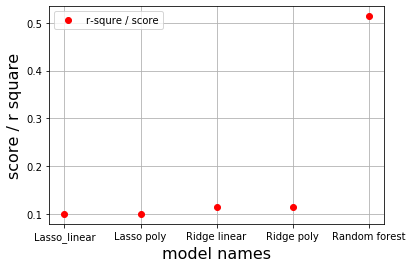

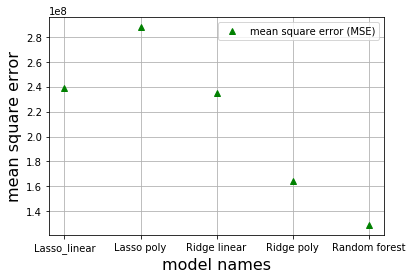

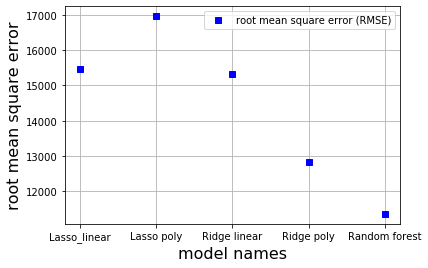

In [59]:
lst_score = [lasso_score, lasso_p_score, ridge_score, ridge_p_score, rf_score]
MSE_lst =  [MSE_lasso, MSE_lasso_p, MSE_ridge, MSE_ridge_p, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_lasso_p, RMSE_ridge, RMSE_ridge_p, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

Obviously, Random Forest is the winner! We should choose this one as our prediction model for the movie prediction. In the future, we can import movie information into this model to predict the viewtimes of those movies to decide if we should import them or not.  

Before we conclude, we can take look at the feature importance to have an intuitively understanding of all those features, which can provide some hints for companies which want to build their own online platform. 

### 6.3 Feature Importance 

According to MSE,RMSE and R square, the Random Forest Regression has the best performance

/opt/conda/envs/data3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


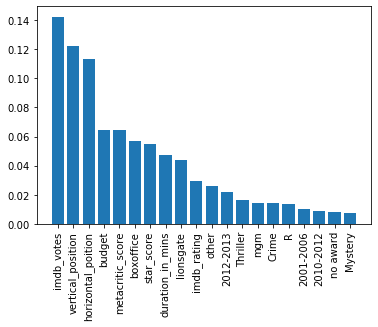

In [61]:
importances = rf.feature_importances_
feature_name = model_train_x.columns.get_values()
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()

From the feature importance histogram we can see that IMDB votes and movie positions do have significant influence on the viewtimes of a movie. 